## Summary
- Of the three drugs studied, Capomulin performed best in terms of survival of subjects, lower number of metasases, and slowing or reversing progression of tumor volume.  
- The study subset of interest began with 100 subjects, 25 assinged to each of the three drugs and 25 assigned to placebo.
- The final surviving number of mice at the ending timepoint -- 45 days -- was 52. Of that surviving group, 21 of those were subjects assigned to Capomulin, 11 were from placebo, 11 from Ketapril, and 9 from Infubinol. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
drugsdf = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

## Preprocessing

In [3]:
data = pd.merge(drugsdf, tumors, how='inner')

data = data.rename(columns={\
                            'Mouse ID': 'mouse_id',\
                            'Tumor Volume (mm3)': 'tumor_vol',\
                            'Metastatic Sites': 'mets'})

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mask_drugs = data['Drug'].isin(drugs)


data_drugs = data[mask_drugs]

## Tumor Volume
Scatter plot: tumor volume changes over time for each treatment 

In [4]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

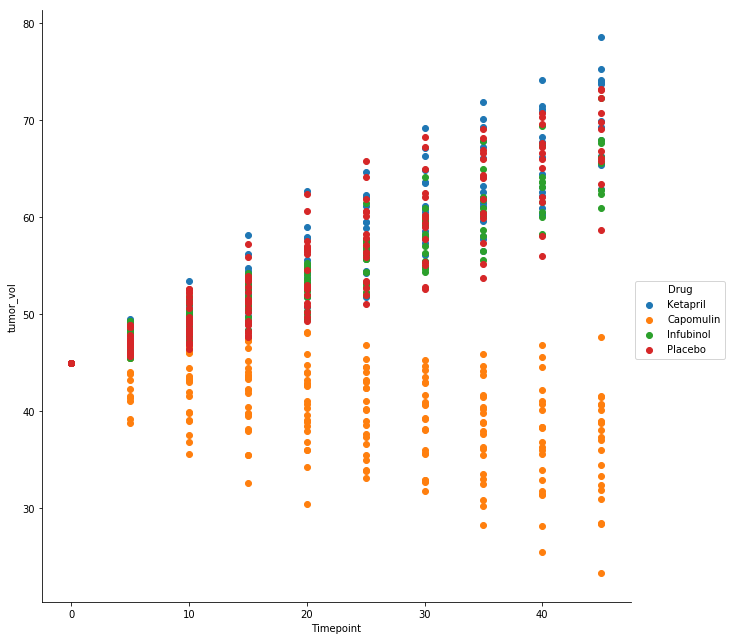

In [5]:
sns.FacetGrid(data_drugs, hue="Drug", size=9,) \
   .map(plt.scatter, "Timepoint", "tumor_vol") \
   .add_legend();

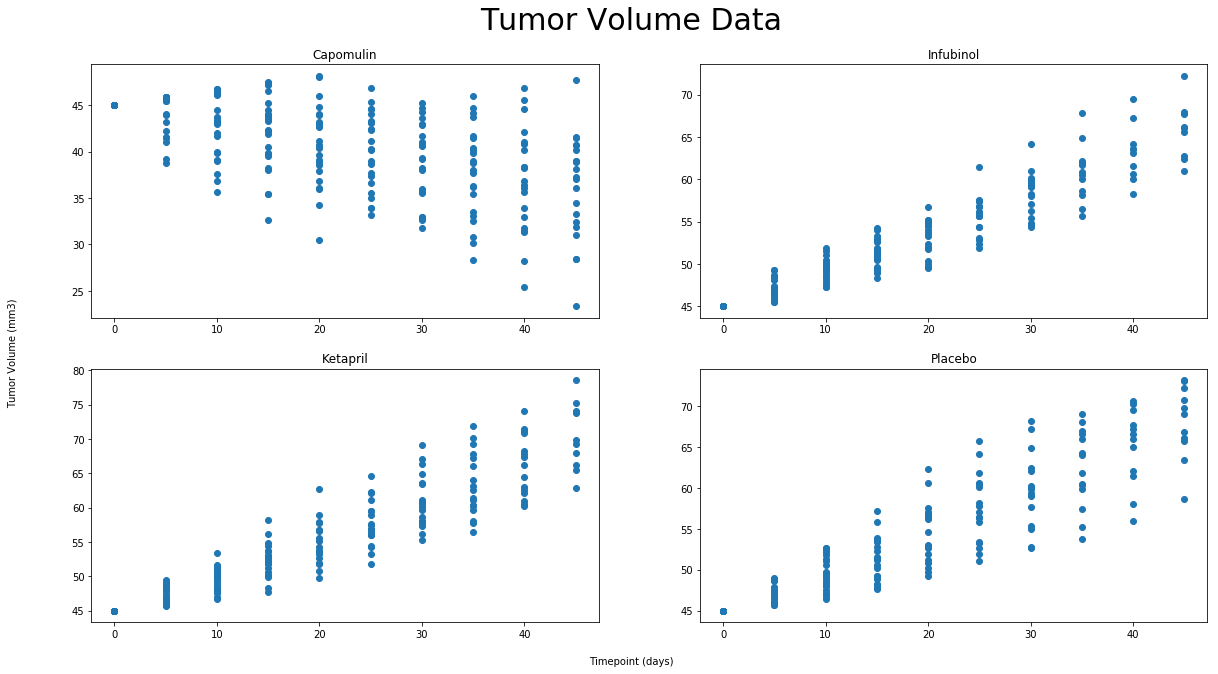

In [6]:
tumorfig = plt.figure(figsize=(20, 10))

axes1 = tumorfig.add_subplot(2, 2, 1)
axes2 = tumorfig.add_subplot(2, 2, 2)
axes3 = tumorfig.add_subplot(2, 2, 3)
axes4 = tumorfig.add_subplot(2, 2, 4)

axes1.plot(capomulin['Timepoint'], capomulin['tumor_vol'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['tumor_vol'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['tumor_vol'], 'o')
axes4.plot(placebo['Timepoint'], placebo['tumor_vol'], 'o')

axes1.set_title("Capomulin")
axes2.set_title("Infubinol")
axes3.set_title("Ketapril")
axes4.set_title("Placebo")

tumorfig.text(0.5, 0.07, 'Timepoint (days)', ha='center', va='center')
tumorfig.text(0.07, 0.5, 'Tumor Volume (mm3)', ha='center', va='center', rotation='vertical')

tumorfig.subplots_adjust(top=0.90)
tumorfig.suptitle("Tumor Volume Data", fontsize=30);

## METASTASES
Scatter plot: number of metastatic sites - changes over time for each treatment

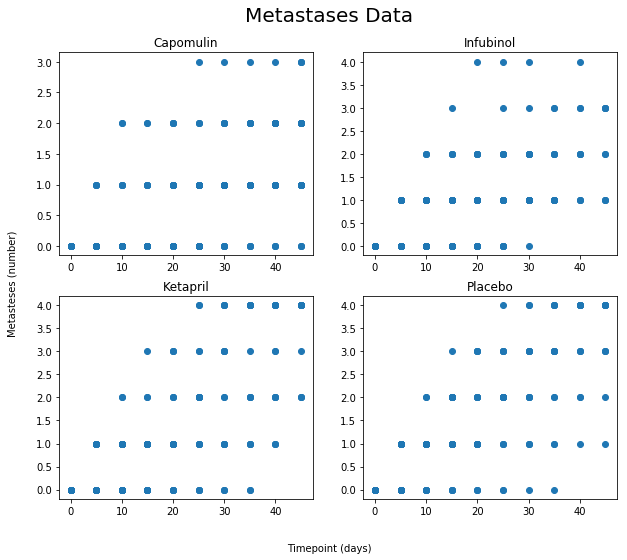

In [7]:
metfig = plt.figure(figsize=(10, 8))

axes1 = metfig.add_subplot(2, 2, 1)
axes2 = metfig.add_subplot(2, 2, 2)
axes3 = metfig.add_subplot(2, 2, 3)
axes4 = metfig.add_subplot(2, 2, 4)

axes1.plot(capomulin['Timepoint'], capomulin['mets'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['mets'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['mets'], 'o')
axes4.plot(placebo['Timepoint'], placebo['mets'], 'o')

axes1.set_title("Capomulin")
axes2.set_title("Infubinol")
axes3.set_title("Ketapril")
axes4.set_title("Placebo")

metfig.text(0.5, 0.04, 'Timepoint (days)', ha='center', va='center')
metfig.text(0.06, 0.5, 'Metasteses (number)', ha='center', va='center', rotation='vertical')

metfig.subplots_adjust(top=0.90)
metfig.suptitle("Metastases Data", fontsize = 20);

#what is a better way to show the metastatic site changes?? 

## SURVIVAL RATE

Scatter plot: number of mice still alive through the course of treatment

In [8]:
subjects = data_drugs.groupby('mouse_id')

In [9]:
srdf = data_drugs.copy()
srdf = srdf.drop('mets', axis=1)
srdf = srdf.drop('tumor_vol', axis=1)

srdf['observed'] = np.where(srdf['Timepoint'] == 45, 1 , 0)
#wth is wrong with this when 1 and 0 are switched

duration = subjects.Timepoint.last() - subjects.Timepoint.first()

sr = srdf.groupby('mouse_id')['observed'].sum().astype(float)
sr = sr.to_frame()
sr = sr.round(1)

sr['dur'] = duration.astype(float)

sr.head()

,observed,dur
mouse_id,,
a203,1.0,45.0
a251,1.0,45.0
a262,1.0,45.0
a457,0.0,10.0
a577,0.0,30.0


In [10]:
drugsdf = drugsdf.rename(columns={'Mouse ID': 'mouse_id'})
sr = sr.reset_index()
drugsdf = drugsdf.sort_values('mouse_id')
sr_drug = pd.merge(drugsdf, sr, on='mouse_id')

sr_drug.head()

,mouse_id,Drug,observed,dur
0,a203,Infubinol,1.0,45.0
1,a251,Infubinol,1.0,45.0
2,a262,Placebo,1.0,45.0
3,a457,Ketapril,0.0,10.0
4,a577,Infubinol,0.0,30.0


In [11]:
capo = sr_drug[sr_drug.Drug == "Capomulin"]
infu = sr_drug[sr_drug.Drug == "Infubinol"]
keta = sr_drug[sr_drug.Drug == "Ketapril"]
plac = sr_drug[sr_drug.Drug == "Placebo"]
#n = 25 for each group

In [36]:
capo.dur.value_counts()

45.0    21
10.0     1
15.0     1
35.0     1
20.0     1
Name: dur, dtype: int64

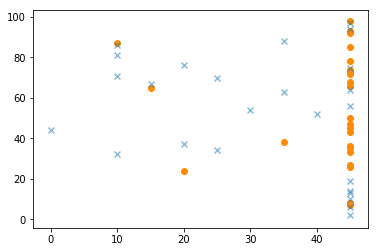

In [12]:
plt.scatter(capo.dur, capo.index, marker='o', color='darkorange')
plt.scatter(plac.dur, plac.index, marker='x',  alpha = 0.5);

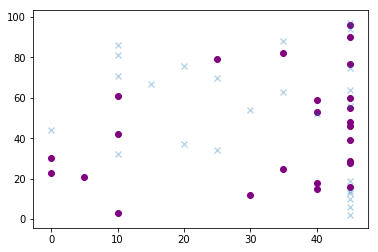

In [13]:
plt.scatter(keta.dur, keta.index, marker='o', color = 'purple')
plt.scatter(plac.dur, plac.index, marker='x', alpha = 0.3);

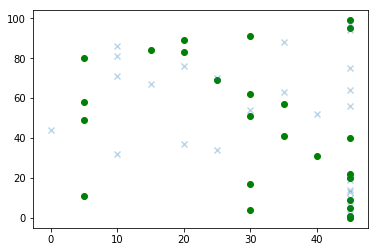

In [14]:
plt.scatter(infu.dur, infu.index, marker='o', color = 'green')
plt.scatter(plac.dur, plac.index, marker='x', alpha = 0.3);

In [40]:
print('k', keta.dur.value_counts())
print('i', infu.dur.value_counts())
print('pl', plac.dur.value_counts())

k 45.0    11
40.0     4
10.0     3
35.0     2
0.0      2
25.0     1
5.0      1
30.0     1
Name: dur, dtype: int64
i 45.0    9
30.0    5
5.0     4
20.0    2
35.0    2
15.0    1
25.0    1
40.0    1
Name: dur, dtype: int64
pl 45.0    11
10.0     4
35.0     2
20.0     2
25.0     2
15.0     1
30.0     1
40.0     1
0.0      1
Name: dur, dtype: int64


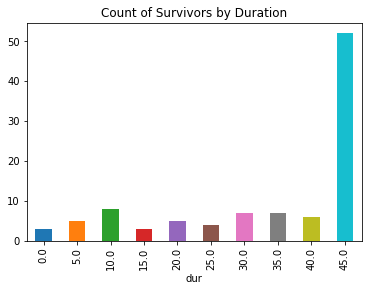

In [15]:
sr.groupby('dur')['mouse_id'].count().plot(kind='bar', title='Count of Survivors by Duration');

In [16]:
sr.groupby('dur')['mouse_id'].count()

dur
0.0      3
5.0      5
10.0     8
15.0     3
20.0     5
25.0     4
30.0     7
35.0     7
40.0     6
45.0    52
Name: mouse_id, dtype: int64

In [17]:
sr_dscr = sr_drug.groupby('Drug')['dur'].describe()

In [18]:
sr_dscr['surv_sem'] = sr_dscr['mean'].pow(1./2)

In [19]:
sr_dscr

,count,mean,std,min,25%,50%,75%,max,surv_sem
Drug,,,,,,,,,
Capomulin,25.0,41.0,10.103630,10.0,45.0,45.0,45.0,45.0,6.403124
Infubinol,25.0,30.6,14.600228,5.0,20.0,30.0,45.0,45.0,5.531727
Ketapril,25.0,32.6,16.337584,0.0,25.0,40.0,45.0,45.0,5.709641
Placebo,25.0,31.2,15.226074,0.0,20.0,35.0,45.0,45.0,5.585696


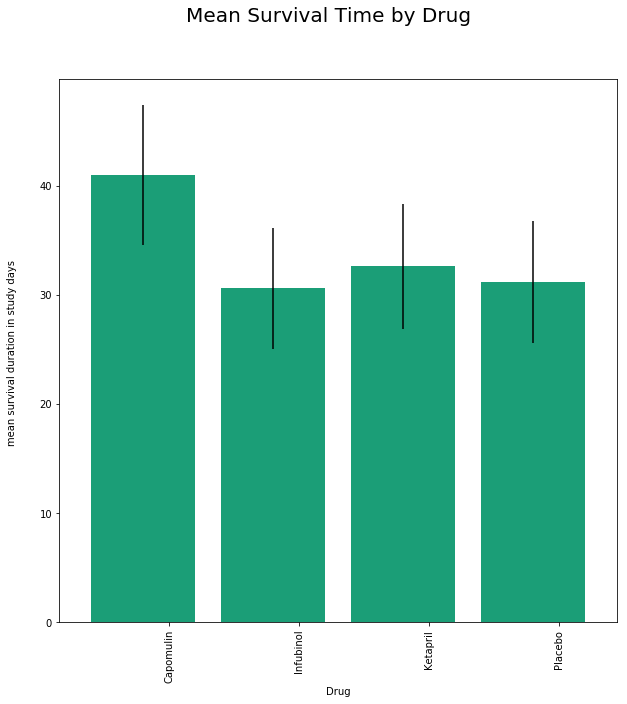

In [20]:
fig, ax = plt.subplots()

srd_plot = sr_dscr['mean'].plot(kind='bar',yerr=sr_dscr["surv_sem"],colormap='Dark2',\
                              grid=False,figsize=(10,10),ax=ax,position=0.75,\
                              error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)

#I know std is not sterr...
fig.text(0.06, 0.5, 'mean survival duration in study days', ha='center', va='center', rotation='vertical')
fig.suptitle("Mean Survival Time by Drug", fontsize = 20)

plt.show()

## Total % Tumor Volume Change
- Bar Graph - total % tumor volume change for each drug across the full 45 days.
- http://cancerres.aacrjournals.org/content/canres/suppl/2012/07/30/0008-5472.CAN-12-0954.DC1/tab2.pdf - Uses initial and final volume. Takes mean, sd, sterrr for the % changes

In [21]:
tumor_vol_change_per_mouse = 100*((subjects.tumor_vol.first() - subjects.tumor_vol.last())\
                                  / subjects.tumor_vol.first())

In [22]:
tumor_vol_change_per_mouse = tumor_vol_change_per_mouse.to_frame()
tumor_vol_change_per_mouse = tumor_vol_change_per_mouse.reset_index()

#drugsdf comes from initial read_csv 
drugsdf = drugsdf.rename(columns={'Mouse ID': 'mouse_id',})
drugsdf = drugsdf.sort_values('mouse_id')

tumor_vol_drug_data = pd.merge(drugsdf, tumor_vol_change_per_mouse, on='mouse_id')

In [23]:
tumor_vol_drug_data.head()

,mouse_id,Drug,tumor_vol
0,a203,Infubinol,-51.052042
1,a251,Infubinol,-45.612762
2,a262,Placebo,-57.150268
3,a457,Ketapril,-10.629820
4,a577,Infubinol,-26.737471


In [24]:
drug_group = tumor_vol_drug_data.groupby('Drug')['tumor_vol']

#total tumor drug volume 
ttdv = drug_group.mean()
ttdv = ttdv.to_frame()

#tumor change in volume
tcv = tumor_vol_drug_data['tumor_vol'].tolist()

In [25]:
cap_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Capomulin"]
inf_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Infubinol"]
ket_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Ketapril"]
plac_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Placebo"]

In [26]:
drug_sems = [stats.sem(cap_vc.tumor_vol), stats.sem(inf_vc.tumor_vol), stats.sem(ket_vc.tumor_vol), stats.sem(plac_vc.tumor_vol)]

In [27]:
drug_sems

[2.5400837010803543, 3.3577725046093874, 4.420408998458811, 3.9442985072748358]

In [28]:
ttdv['error'] = drug_sems

In [29]:
ttdv

,tumor_vol,error
Drug,,
Capomulin,18.516516,2.540084
Infubinol,-30.442222,3.357773
Ketapril,-39.569314,4.420409
Placebo,-34.463143,3.944299


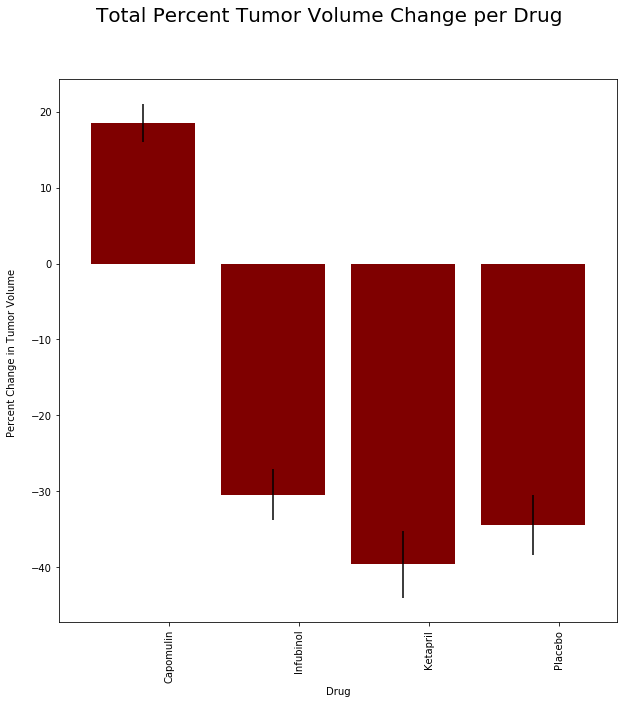

In [30]:
fig, ax = plt.subplots()

tvplot = ttdv['tumor_vol'].plot(kind='bar',yerr=ttdv["error"],colormap='OrRd_r',\
                              grid=False,figsize=(10,10),ax=ax,position=0.75,\
                              error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)

fig.text(0.06, 0.5, 'Percent Change in Tumor Volume', ha='center', va='center', rotation='vertical')
fig.suptitle("Total Percent Tumor Volume Change per Drug", fontsize = 20)

plt.show()
#the negative percent change means the tumor volume increased. 

## SURVIVAL FUNCTION NOT MAKING SENSE
- if there is an obvious reason why and I am just not seeing it, I would love to hear it!

In [31]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [32]:
T = sr["dur"]
E = sr["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 100 observations, 48 censored>

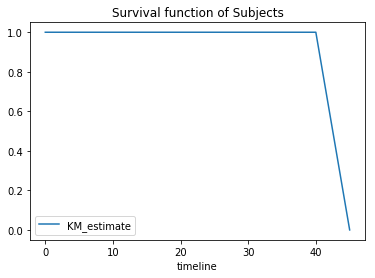

In [33]:
kmf.survival_function_.plot()
plt.title('Survival function of Subjects');

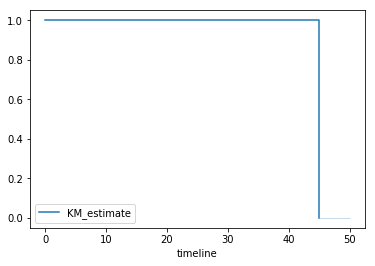

In [34]:
kmf.plot()